In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks # function that finds peaks in signals 
import random

In [2]:
# unloading of data
# the decaying muon counts in relation to channels UNCALLIBRATED
uncallibrated_time , ticks = np.loadtxt('muondetectionlab.dat', unpack=True)
# time reference with respect to channels
bins , time_reference = np.loadtxt('lifetime_callibration.dat', unpack=True) 
#COMMENT : uncallibrated_time and bins are the same vector

We have 91056.0 counts (i.e. start signal to stop signal), where 
Start Signal: "tick" at bottom scintillator AND barrel 
Stop Signal : "tick" at barrel AND NOT on bottom scintilator
We have some zero counts at the start. They will affect our data, so we will deal discard them after time callibration of course


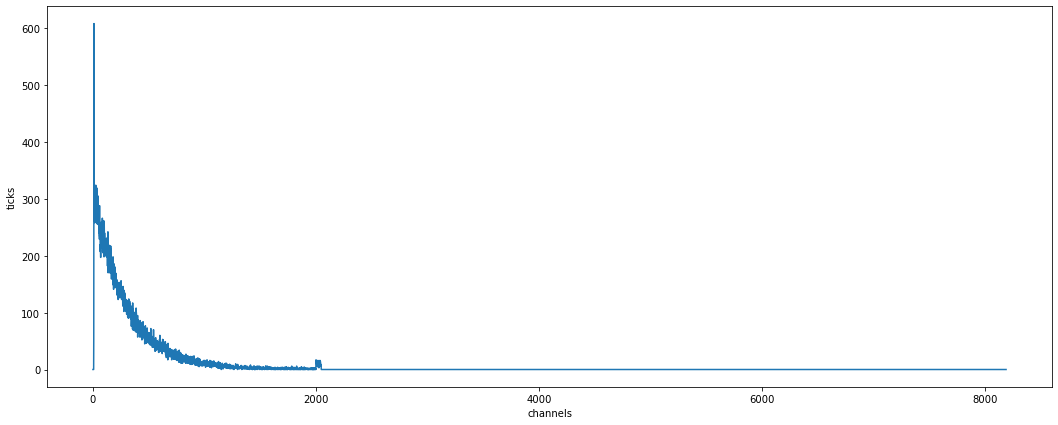

In [3]:
plt.figure(figsize=(18,7))
plt.plot(uncallibrated_time, ticks) # or bins its the same 
print(f'We have {np.sum(ticks)} counts (i.e. start signal to stop signal), where \nStart Signal\
: "tick" at bottom scintillator AND barrel \nStop Signal : "tick" at barrel AND NOT on bottom scintilator')
print('We have some zero counts at the start. They will affect our data, so we will deal discard them after \
time callibration of course')
plt.xlabel('channels'); plt.ylabel('ticks');

channel positions of the 18 peaks [ 24  58  91 125 153 186 219 252 289 322 354 386 422 455 488 521 546 579]


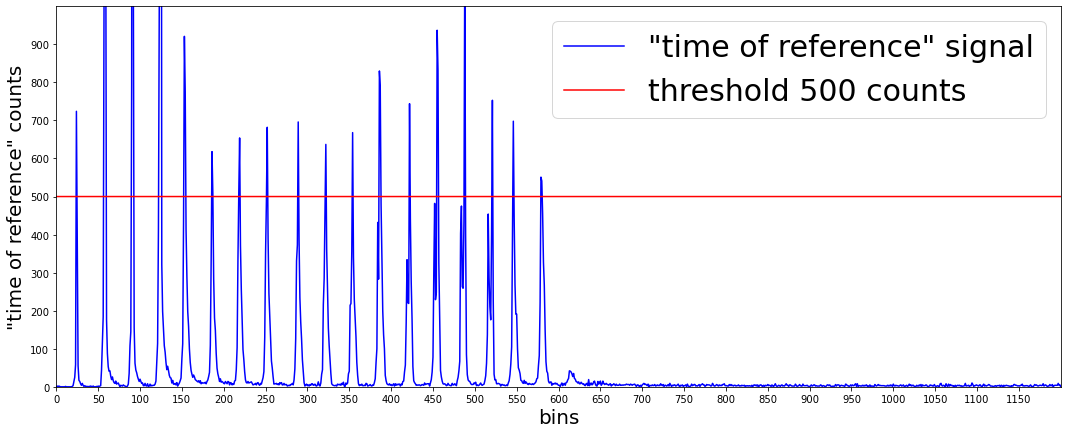

In [4]:
# plot to present our data 
plt.figure(figsize=(18,7))
plt.plot(bins,time_reference,'b',label='"time of reference" signal') # time signal with respect to channels
threshold = 500 # we set a threshold line of counts for easier depiction
plt.plot(bins,bins*0+threshold,'r',label='threshold 500 counts')

# plot details 
plt.xlim(0,1200) 
plt.ylim(0,1000) 
plt.yticks(np.arange(0, 1000, step=100));
plt.xticks(np.arange(0, 1200, step=50));
plt.xlabel('bins',size=20)
plt.ylabel('"time of reference" counts',size=20)  
plt.legend(loc='best',fontsize=30);

# this functions chooses peaks with height more than the threshold
peak_position = find_peaks(time_reference,height=threshold)[0] 
delta_peak_position = np.zeros (len(peak_position)-1)
for n in range(len(peak_position)-1):
    delta_peak_position[n]=(peak_position[n+1]-peak_position[n])
print(f'channel positions of the {len(peak_position)} peaks {peak_position}')

The signal noise is also interesting here


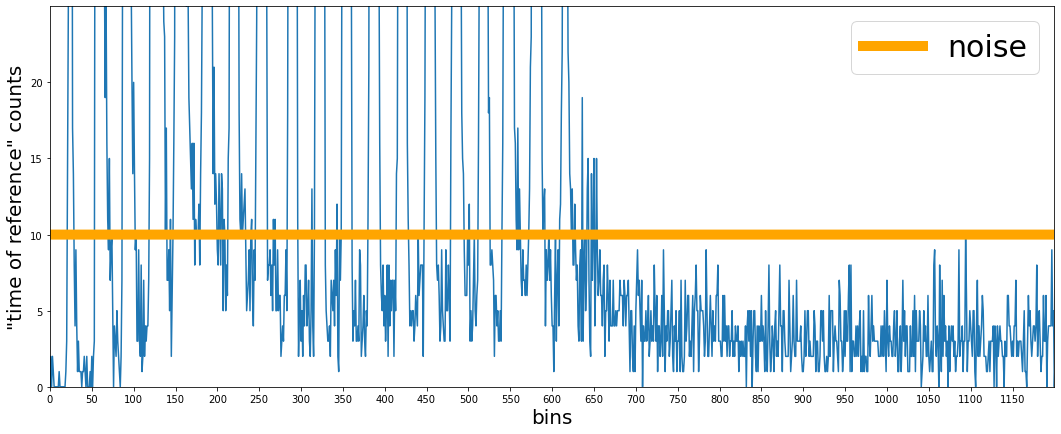

In [5]:
#zoomed in plot to see the noise better

plt.figure(figsize=(18,7))
plt.plot(bins,time_reference) # plot of time ticks with respect to channels
plt.plot(bins,bins*0+10,'orange',linewidth=10,label='noise')  
plt.legend(loc='best',fontsize=30);
plt.xlim(0,1200); plt.xticks(np.arange(0, 1200, step=50));
plt.ylim(0,25); plt.yticks(np.arange(0, 25, step=5));
plt.xlabel('bins',size=20) ; plt.ylabel('"time of reference" counts',size=20); 

print('The signal noise is also interesting here')

The mean interval betwen peaks is 32.6 μsecs
So each bin has a time duration 0.25 microsecs / mean peak difference = 0.00766 microsecs


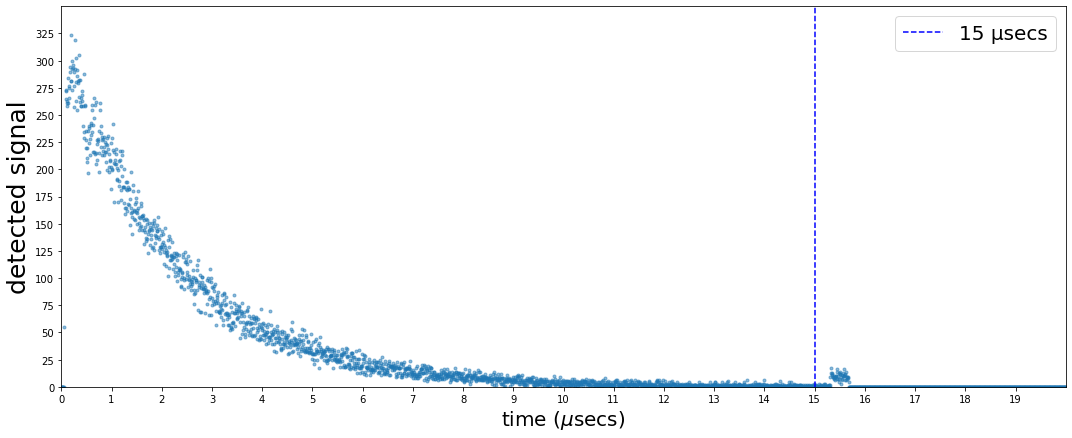

In [6]:
mean_peak_difference = np.mean(delta_peak_position)
#error = np.sqrt(np.std(peakdif)**2/len(peakdif))
bin_duration = (0.25*1e-6)/mean_peak_difference
callibrated_time = bins * bin_duration  # callibration of time in microsecs

print(f'The mean interval betwen peaks is {mean_peak_difference:1.3} \u03BCsecs')#, with error {error}')
print(f'So each bin has a time duration 0.25 microsecs / mean peak difference = {bin_duration*1e+6:.3} microsecs')


# plot of ALL data in real callibrated time 
top_bin = 8192 
cal_time = callibrated_time[:top_bin]
muons = ticks[:top_bin]

plt.figure(figsize=(18,7))
plt.plot(cal_time*1e+6, muons, '.', alpha=0.5)      #, label='data points')


# plot details
plt.xlim(0,20) ; plt.xticks(np.arange(0, 20, step=1));
plt.ylim(0,350) ; plt.yticks(np.arange(0, 350, step=25));

plt.xlabel('time ($\mu$secs)',size=20)
plt.ylabel('detected signal',size=25)  

plt.axvline(x=15,color='b',linestyle='--',label = '15 \u03BCsecs');
plt.legend(loc='best', fontsize=20);

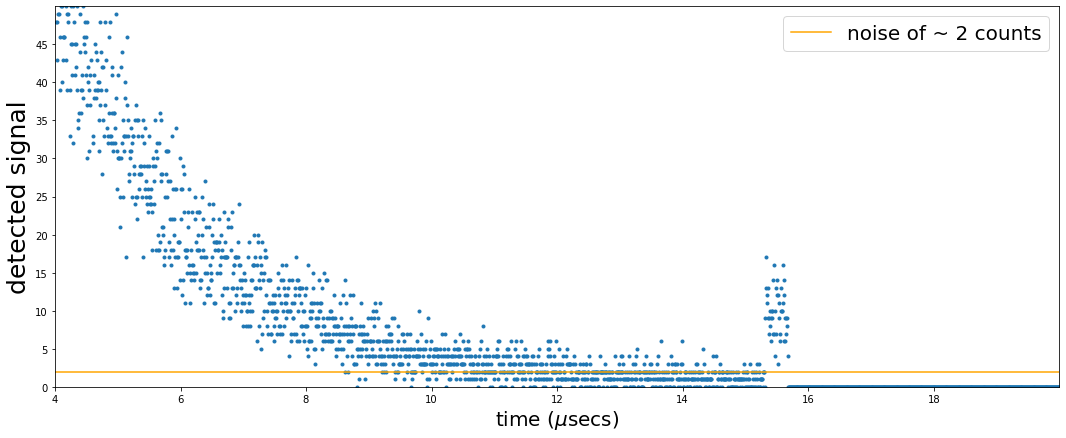

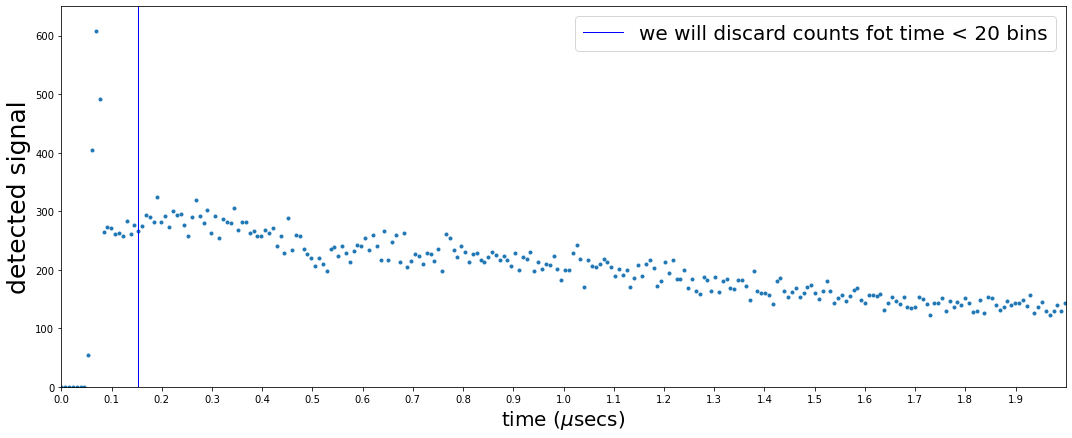

In [7]:
# plot of data in callibrated time 
top_bin = 8192
cal_time = callibrated_time[:top_bin]
muons = ticks[:top_bin]

plt.figure(figsize=(18,7))
plt.plot(cal_time*1e+6, muons, '.', alpha=1)    


# plot details
plt.xlim(4,20) ; plt.xticks(np.arange(4, 20, step=2));
plt.ylim(0,50) ; plt.yticks(np.arange(0, 50, step=5));

plt.xlabel('time ($\mu$secs)',size=20)
plt.ylabel('detected signal',size=25);
noise = 2
plt.axhline(y=noise,color='orange',linestyle='-', label = 'noise of ~ ' + str(noise)+' counts');
plt.legend(loc='best', fontsize=20);


plt.figure(figsize=(18,7))
plt.plot(cal_time*1e+6, muons, '.', alpha=1)    

# plot details
plt.xlim(0,2) ; plt.xticks(np.arange(0, 2, step=0.1));
plt.ylim(0,650) ; plt.yticks(np.arange(0, 650, step=100));

plt.xlabel('time ($\mu$secs)',size=20)
plt.ylabel('detected signal',size=25);
mult = 20
plt.axvline(x = mult *(bin_duration*1e+6),color='blue',linestyle='-',linewidth=1, \
            label = 'we will discard counts fot time < ' + str(mult)+ ' bins');
plt.legend(loc='best', fontsize=20);



In [8]:
# new data we take sample size of 2048 bins while discarding the first 20
top_bin = 2048
discard = 20 
data_time = callibrated_time[:top_bin][discard:] 
data_ticks = ticks[:top_bin][discard:]

In [9]:
#theroretical muon curve to fit on data

def muon_decay(interval,start,tau,background):
    return start*np.exp(-interval/lifetime_theoretical)+bgnd

# for bin duration 0.25/mean_peak_difference =0,00766 * 2048 around 15 microseconds of sampling
interval = np.linspace(0,15,100) 
counts_start = 320 ; lifetime_theoretical = 2.1969811 ; bgnd = noise
decay = muon_decay(interval,counts_start,lifetime_theoretical,bgnd)


Lets do an exponential regression using a linear model we learned in TIF285   
<br>
$\quad \quad y=a e^{-\beta t} + c  \quad => \quad ln(y-c) = lna -\beta t \quad => \quad y'= \theta_0 + \theta_1 x $ 
<br> <br>
 Our experiment data in this formulation $\quad  y' = ln(N-bgnd), \quad \theta_0 = ln (N_O) , \quad \theta_1=-\frac{1}{\tau} , \quad x=t$ , where bgnd is a fixed arbitrary value.

In [10]:
def design_matrix(x, degree):                         
    return np.vander(x,degree+1,increasing=True)

def solve_normal_equation(dM, d):    
    multiply = np.dot
    inverse = np.linalg.inv
    a_best = multiply(multiply(inverse(multiply(dM.T,dM)),dM.T),d)
    return a_best

In [11]:
# we chose the interval with non zero values of muons because log goes to -inf so only the first 1000 bins

pick = 1151-discard # pick first 1141 values
non_zero_ticks = data_ticks [:pick] # new data points
non_zero_ticks_time = data_time [:pick]
bgndR = 1 # constant background of 1
theta_vector = solve_normal_equation(design_matrix(non_zero_ticks_time,1), np.log(non_zero_ticks-bgndR))

# results
No = np.exp(theta_vector[0])
tau = -1/theta_vector[1]

# print results
print(f' For data taken from from {non_zero_ticks_time[discard+1]/1e-6:.3} \u03BCsecs to \
{non_zero_ticks_time[len(non_zero_ticks)-1]/1e-6:.5} \u03BCsecs (when muon counts dont have 0 values) ')
print(f'\n Exponential Regression method gives No={int(No)} and  \u03C4 ={tau*1e+6:.5} \u03BCsecs')

 For data taken from from 0.314 μsecs to 8.8063 μsecs (when muon counts dont have 0 values) 

 Exponential Regression method gives No=324 and  τ =2.1438 μsecs


In [12]:
# function to plot decay for the best fit parameters with exponential regression 
regression_function = muon_decay(interval,No,tau*1e+6,0) 

# print results

print(f' theoretical decay, No={counts_start} and mean life time is \u03C4 = {lifetime_theoretical:.4} \u03BCsecs  ' )
print(f' exponential regression model decay, No={int(No)} and mean life time is \u03C4 ={tau*1e+6:.4} \u03BCsecs  ' )

 theoretical decay, No=320 and mean life time is τ = 2.197 μsecs  
 exponential regression model decay, No=324 and mean life time is τ =2.144 μsecs  


Now lets try doing it by minimizing either a cost function 

$C=\frac{1}{2n}\sum{(n_i-m_i)^2} $  or the chi squared function $\chi^2 =\sum{\frac{(n_i-m_i)^2}{n_i}} $ , where $n_i$ are the observations and $m_i = a e^{-\frac{t_i}{\tau}} + \beta $ the model values.

We picked the $\chi^2$ minimization method as it most used in data analysis

In [13]:
from scipy.optimize import minimize  # function to minimize the chi squared hyperparameter

def chi_squared(theta_vec,t,n):
    m = theta_vec[0] * np.exp(-t/theta_vec[1])  +  theta_vec[2]
    return  sum(((n-m)/np.sqrt(n))**2)#/(pick-3))

def func(theta_vec):
    t = data_time [:pick]
    n = data_ticks [:pick]
    return chi_squared(theta_vec,t,n)

In [14]:
# I dont like it, the value depend on the initial guess NAAAAAAA

x0 = np.array ([data_ticks[0],2.2*1e-6,2]) # initial guess
chi_squared_min = minimize (func , x0, bounds=[(200,500),(1e-6,3*1e-6),(0,10)])
chi_squared_min.x[0]
minimization_function = muon_decay(interval, chi_squared_min.x[0],chi_squared_min.x[1]*1e+6,chi_squared_min.x[2])

#print all results

print(f'theoretical value lifetime decay,    No={counts_start} counts, mean life time \u03C4={lifetime_theoretical:.4} \u03BCsecs \n ' )
print(f'exponential regression model decay,  No={int(No)} counts, mean life time \u03C4={tau*1e+6:.4} \u03BCsecs \n ' )
print(f'chisquared minimization model decay, No={int(chi_squared_min.x[0])} counts, mean life time \u03C4=\
{chi_squared_min.x[1]*1e+6:.5} \u03BCsecs and background {round(chi_squared_min.x[2],2)} counts ' )

print(f'\n\nexponential regression method gives lifetime {abs(100*(lifetime_theoretical-tau*1e+6)):1.3}\
% bigger than the theoretical value')
print(f'chi_squared minimization method gives lifetime {100*(np.abs(lifetime_theoretical-chi_squared_min.x[1]*1e+6)):1.3}\
% bigger than the theoretical value')

theoretical value lifetime decay,    No=320 counts, mean life time τ=2.197 μsecs 
 
exponential regression model decay,  No=324 counts, mean life time τ=2.144 μsecs 
 
chisquared minimization model decay, No=308 counts, mean life time τ=2.2001 μsecs and background 0.61 counts 


exponential regression method gives lifetime 5.32% bigger than the theoretical value
chi_squared minimization method gives lifetime 0.308% bigger than the theoretical value


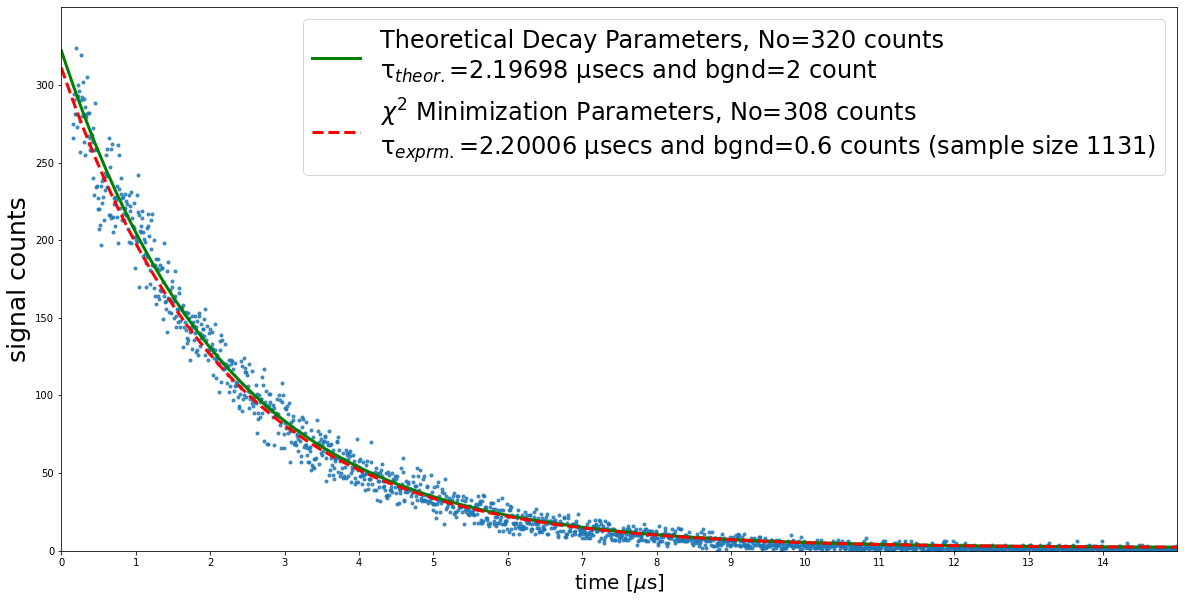

In [15]:
# plot data with theoretical decay and regression decay and chi squared minimization
plt.figure(figsize=(20,10))

# data
plt.plot(data_time*1e+6, data_ticks, '.', alpha=0.8)      #, label='data points')

# theoretical
plt.plot(interval, decay,'green', linewidth=3,alpha=1, label='Theoretical Decay Parameters, No='+ \
         str(counts_start)+' counts\n\u03C4${}_{theor.}$='+str(round(lifetime_theoretical,5))+' \u03BCsecs and bgnd='+str(bgnd)+' count')

# regression
#plt.plot(interval,regression_function,'g--',linewidth=6,  label= 'exponential regression curve for No='+ \
        # str(int(No))+' counts\n\u03C4='+str(round(tau*1e+6,3)) +' \u03BCsecs and bgnd='+str(bgndR)+' count (sample size '+str(pick)+')')

# chi squared 
plt.plot(interval,minimization_function,'r--',linewidth=3,  label= '$\chi^2$ Minimization Parameters, No='+ \
         str(int(chi_squared_min.x[0]))+' counts\n\u03C4${}_{exprm.}$='+str(round(chi_squared_min.x[1]*1e+6,5)) \
         +' \u03BCsecs and bgnd='+str(round(chi_squared_min.x[2],1))+' counts (sample size '+str(pick)+')')



# plot details
plt.xlim(0,15) ; plt.xticks(np.arange(0, 15, step=1));
plt.ylim(0,350) ; plt.yticks(np.arange(0, 350, step=50));

plt.xlabel('time [$\mu$s]',size=20)
plt.ylabel('signal counts',size=25)  
plt.legend(loc='best', fontsize=24);




Lets do it for 1000 initial tries close to the initial guess

In [123]:
k = 1000
ampl_exp = np.zeros(k)
tau_exp = np.zeros(k)
bgnd_exp = np.zeros(k)

for times in range(k):
    rand0 = 1+random.uniform(-0.1,0.1)
    rand1 = 1+random.uniform(-0.1,0.1)
    rand2 = 1+random.uniform(-0.1,0.1)
    x0 = np.array ([data_ticks[0]*rand0,(2.2*1e-6)*rand1,2*rand2]) # initial guess
    chi_squared_min = minimize (func , x0, bounds=[(250,500),(1e-6,3*1e-6),(0,10)])
    ampl_exp [times] = chi_squared_min.x[0]
    tau_exp [times] = chi_squared_min.x[1]
    bgnd_exp [times] = chi_squared_min.x[2]
    
print(np.mean(ampl_exp), np.std(ampl_exp))
print(np.mean(tau_exp), np.std(tau_exp)) 
print(np.mean(bgnd_exp), np.std(bgnd_exp))

310.32465102142737 12.684390908630096
2.2090505289437097e-06 5.1757069960541924e-08
0.2803833059809002 0.6114330718000204


In [128]:
#print all results
print(f'amplitude = {np.mean(ampl_exp)}, stdv = {np.std(ampl_exp)}')
print(f'lifetime = {np.mean(tau_exp)}, stdv = {np.std(tau_exp)}')
print(f'background = {np.mean(bgnd_exp)}, stdv ={np.std(bgnd_exp)}')


print(f'\n\n\n\ntheoretical value lifetime decay,    No={counts_start} counts, mean life time \u03C4={lifetime_theoretical:.4} \u03BCsecs \n ' )
print(f'exponential regression model decay,  No={int(No)} counts, mean life time \u03C4={tau*1e+6:.4} \u03BCsecs \n ' )
print(f'chisquared minimization model decay, No={int(np.mean(ampl_exp))} counts, mean life time \u03C4=\
{np.mean(tau_exp)*1e+6:.5} \u03BCsecs and background {round(np.mean(bgnd_exp),2)} counts ' )

print(f'(chi_squared - theoretical)%= {100*(lifetime_theoretical-np.mean(tau_exp)*1e+6):1.3}')

amplitude = 310.32465102142737, stdv = 12.684390908630096
lifetime = 2.2090505289437097e-06, stdv = 5.1757069960541924e-08
background = 0.2803833059809002, stdv =0.6114330718000204




theoretical value lifetime decay,    No=320 counts, mean life time τ=2.197 μsecs 
 
exponential regression model decay,  No=324 counts, mean life time τ=2.144 μsecs 
 
chisquared minimization model decay, No=310 counts, mean life time τ=2.2091 μsecs and background 0.28 counts 
(chi_squared - theoretical)%= -1.21


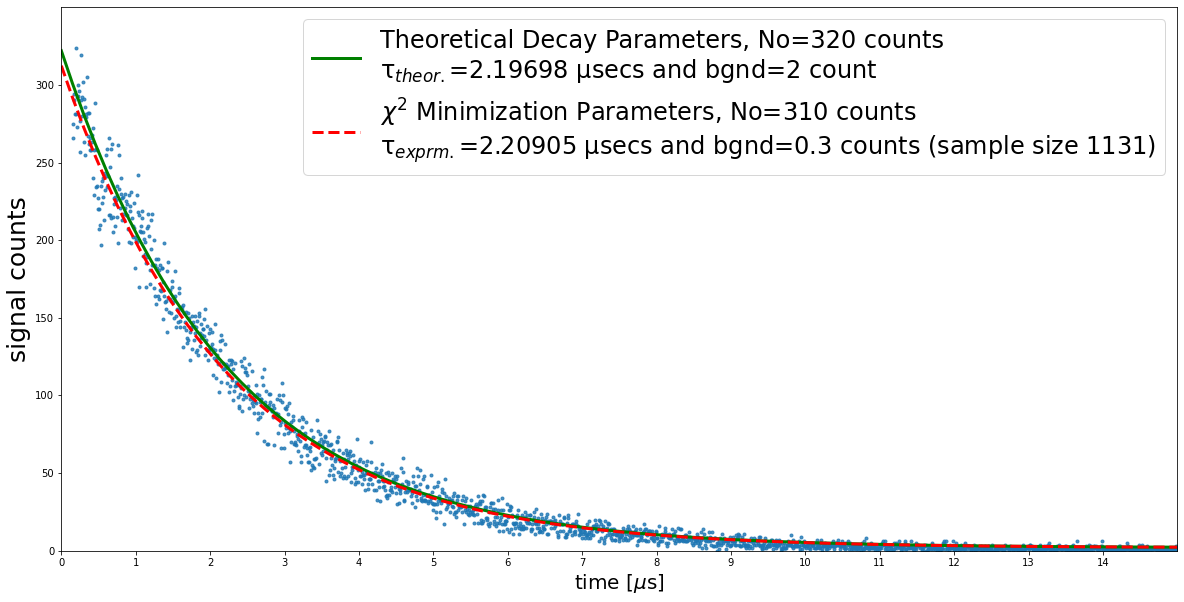

In [126]:
minimization_function = muon_decay(interval, np.mean(ampl_exp),np.mean(tau_exp)*1e+6,np.mean(bgnd_exp))

# plot data with theoretical decay and regression decay and chi squared minimization
plt.figure(figsize=(20,10))

# data
plt.plot(data_time*1e+6, data_ticks, '.', alpha=0.8)      #, label='data points')

# theoretical
plt.plot(interval, decay,'green', linewidth=3,alpha=1, label='Theoretical Decay Parameters, No='+ \
         str(counts_start)+' counts\n\u03C4${}_{theor.}$='+str(round(lifetime_theoretical,5))+' \u03BCsecs and bgnd='+str(bgnd)+' count')

# regression
#plt.plot(interval,regression_function,'g--',linewidth=6,  label= 'exponential regression curve for No='+ \
        # str(int(No))+' counts\n\u03C4='+str(round(tau*1e+6,3)) +' \u03BCsecs and bgnd='+str(bgndR)+' count (sample size '+str(pick)+')')

# chi squared 
plt.plot(interval,minimization_function,'r--',linewidth=3,  label= '$\chi^2$ Minimization Parameters, No='+ \
         str(int(np.mean(ampl_exp)))+' counts\n\u03C4${}_{exprm.}$='+str(round(np.mean(tau_exp)*1e+6,5)) \
         +' \u03BCsecs and bgnd='+str(round(np.mean(bgnd_exp),1))+' counts (sample size '+str(pick)+')')



# plot details
plt.xlim(0,15) ; plt.xticks(np.arange(0, 15, step=1));
plt.ylim(0,350) ; plt.yticks(np.arange(0, 350, step=50));

plt.xlabel('time [$\mu$s]',size=20)
plt.ylabel('signal counts',size=25)  
plt.legend(loc='best', fontsize=24);